In [3]:
import tensorflow as tf
import numpy as np
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

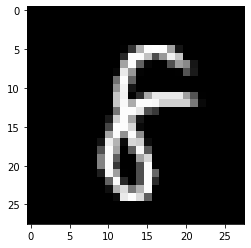

In [5]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[456], cmap="gray")
plt.show()

In [13]:
Xtrain = Xtrain.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)

In [14]:
Xtrain.shape

(60000, 784)

In [16]:
##One-Hot endcoder
def onehot(Y, nclass=10):
    Y_ = np.zeros((Y.shape[0], nclass))
    for i, y in enumerate(Y):
        Y_[i, Y[i]] = 1
    return Y_

In [ ]:
##One-Hot with keras
Y = tf.keras.utils.to_categorical(Y, num_class=10)

In [17]:
Ytrain = onehot(Ytrain)
Ytest = onehot(Ytest)

In [19]:
Ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [28]:
##768->200->200->10
d_in = (Xtrain.shape[1], )
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=d_in,
                                activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

model.fit(Xtrain/255., Ytrain, epochs=100, validation_data=(Xtest, Ytest))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0904 - val_loss: 0.1727
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - val_loss: 0.1691
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - val_loss: 0.1645
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - val_loss: 0.1597
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - val_loss: 0.1548
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - val_loss: 0.1506
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - val_loss: 0.1464
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - val_loss: 0.1419
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - val_loss: 0.1369
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [29]:
Z = model.predict(Xtest/255.)
print(np.sum(Z.argmax(axis=1) == Ytest.argmax(axis=1))/len(Ytest))

0.8869


In [6]:
Z[1].sum()

NameError: name 'Z' is not defined